1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import fftpack
import pandas as pd
import math

Z =  3.4661629670697414


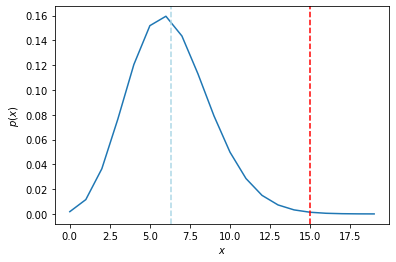

In [10]:
x0 = 15
mu = 6.3

# determine the Z score
Z = abs(x0 - mu) / math.sqrt(mu)
print("Z = ", Z)

# Poisson
k = np.arange(20)
y = stats.poisson.pmf(k, mu)
plt.plot(k, y)
plt.axvline(x0, linestyle='--', color='red', label=r'$\bar{x}$')
plt.axvline(mu, linestyle='--', color='lightblue', label='$\mu$')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

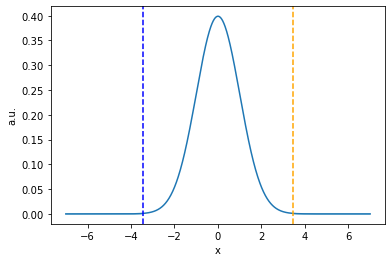

p-value = 0.0005279431738299246


In [13]:
xs = np.linspace(-7, +7, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [18]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = math.sqrt((sigma_1**2 + sigma_2**2)/2)

x_pre = np.mean(pre)
x_post = np.mean(post)
T = (x_pre - x_post)/(sigma*math.sqrt(2/n))

print("T = ",T)

# now we calculate the p-value.
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("Since the p-value is <𝛼/2, we do not accept the null hypothesis")
print("The change in blod pressure is significant")

T =  -3.786997938137629
p-value = 0.004302464132864604
Since the p-value is <𝛼/2, we do not accept the null hypothesis
The change in blod pressure is significant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

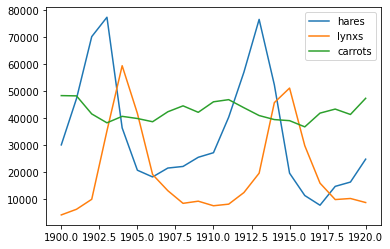

In [24]:
# load the data
data = np.loadtxt("data/populations.txt")

df = pd.DataFrame(data)
years = df[0].values
hares = df[1].values
lynxs = df[2].values
carrots = df[3].values
plt.plot(years, hares, label='hares')
plt.plot(years, lynxs, label='lynxs')
plt.plot(years, carrots, label='carrots')
plt.legend()

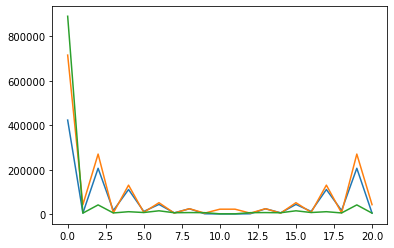

Period lynxes:  10.5 years
Period hares:  10.5 years
Period carrots:  10.5 years


In [31]:
def periode_find(population):
    sig_fft = fftpack.fft(population)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(len(population))

    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    # find the max of freqs array
    peak_freq = freqs[powes.argmax()]
    periode = 1/peak_freq
    
    plt.plot(abs(sig_fft))
    
    return periode


periode_lynxes = periode_find(lynxes)
periode_hares = periode_find(hares)
periode_carrots = periode_find(carrots)

plt.show()
print("Period lynxes: ", periode_lynxes, "years")
print("Period hares: ", periode_hares, "years")
print("Period carrots: ", periode_carrots, "years")



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

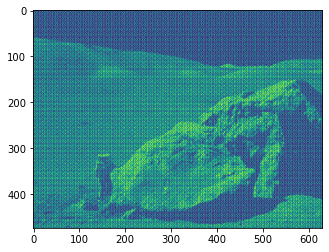

In [15]:
from matplotlib.colors import LogNorm

# load the image
image = plt.imread("moonlanding.png")
plt.imshow(image)

Text(0.5, 1.0, 'Resulting image')

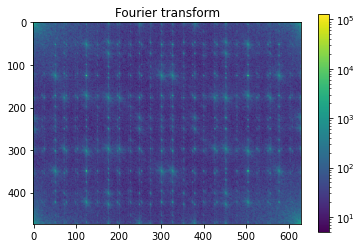

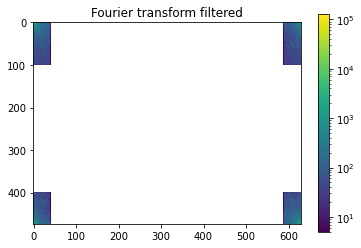

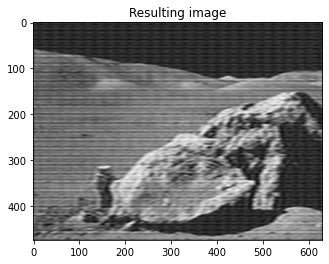

In [26]:
# use the 2D fft
im_fft = fftpack.fft2(image)
#Manage complex
image_2 = np.abs(im_fft)

#diplay the fourier transform
plt.imshow(image_2, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

# put the high values of frequeces at 0
high_freq_fft = im_fft.copy()
#Rows
high_freq_fft[100:400] = 0
#Columns
high_freq_fft[:, 40:590] = 0

# display the new fourier transform
plt.figure()
plt.imshow(np.abs(high_freq_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform filtered')

# Apply the inverse Fourier transform 
plt.figure()
image3 = fftpack.ifft2(high_freq_fft).real
plt.imshow(image3,plt.cm.gray)
plt.title("Resulting image")